In [1]:
#usamos el API de kaggle para descargarnos unos data sets con el precio historico de varias cryptomonedas
! kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

 63%|████████████████████████              | 1.00M/1.58M [00:00<00:00, 5.67MB/s]
100%|██████████████████████████████████████| 1.58M/1.58M [00:00<00:00, 7.28MB/s]


In [2]:
#Importamos todas las librerias que vamos a utilizar en este projecto.
import requests 
import json
import os
from dotenv import load_dotenv
import pandas as pd
from pandas import json_normalize
import tweepy
import time
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [3]:
!ls


ETHERUM & STOCK PRICES.ipynb       coin_Monero.csv
README.md                          coin_NEM.csv
Risk and Returns: The Sharpe Ratio coin_Polkadot.csv
coin_Aave.csv                      coin_Solana.csv
coin_BinanceCoin.csv               coin_Stellar.csv
coin_Bitcoin.csv                   coin_Tether.csv
coin_Cardano.csv                   coin_Tron.csv
coin_ChainLink.csv                 coin_USDCoin.csv
coin_Cosmos.csv                    coin_Uniswap.csv
coin_CryptocomCoin.csv             coin_WrappedBitcoin.csv
coin_Dogecoin.csv                  coin_XRP.csv
coin_EOS.csv                       cryptocurrencypricehistory.zip
coin_Ethereum.csv                  portadaw3.jpg
coin_Iota.csv                      your-code
coin_Litecoin.csv


In [4]:
#descomprimimos el archivo que contiene el data set y lo borramos
!tar -xzvf cryptocurrencypricehistory.zip
!rm -rf cryptocurrencypricehistory.zip

x coin_Aave.csv
x coin_BinanceCoin.csv
x coin_Bitcoin.csv
x coin_Cardano.csv
x coin_ChainLink.csv
x coin_Cosmos.csv
x coin_CryptocomCoin.csv
x coin_Dogecoin.csv
x coin_EOS.csv
x coin_Ethereum.csv
x coin_Iota.csv
x coin_Litecoin.csv
x coin_Monero.csv
x coin_NEM.csv
x coin_Polkadot.csv
x coin_Solana.csv
x coin_Stellar.csv
x coin_Tether.csv
x coin_Tron.csv
x coin_USDCoin.csv
x coin_Uniswap.csv
x coin_WrappedBitcoin.csv
x coin_XRP.csv


In [5]:
#Creamos varios data frames con las monedas que vamos a trabajar. 
df_bitcoin = pd.read_csv('coin_Bitcoin.csv', parse_dates = ['Date'])
df_ether = pd.read_csv('coin_Ethereum.csv', parse_dates = ['Date'])

In [6]:
#Creamos 3 dataframes con de las monedas que vamos a usar
ether = pd.DataFrame(df_ether)
bitcoin = pd.DataFrame(df_bitcoin)
ether.Date.dtypes

dtype('<M8[ns]')

In [7]:
bitcoin.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [8]:
ether.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [9]:
#we notice that the dates are not set in datetime, we want them in this format for our timeseries analaysis. 

In [10]:
#WE CREATE A datetime column using the pd.to_datetime function
ether['datetime'] = pd.to_datetime(ether['Date'])
#we drop the date time column in string format
ether.drop('Date', axis=1, inplace = True)
#we do the same for bitcoin
bitcoin['datetime'] = pd.to_datetime(bitcoin['Date'])
bitcoin.drop('Date', axis = 1, inplace = True)



In [11]:
ether.datetime.dtypes

dtype('<M8[ns]')

In [12]:
# como decodificar un timestamp a un numero datetime
timestamp = 1617986247
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2021-04-09 17:37:27
type(dt_object) = <class 'datetime.datetime'>


In [13]:
#definimos una funcion que convierte un valor timestamp a un valor datetime usando un apply
#la funcion necesita tener datetime importado
def ts_to_dt(df, column, new_column):
    df[str(new_column)] = df[column].apply(datetime.fromtimestamp)
    return df
        
    

In [14]:
# We define some functions that will help us create some columns we are interested in.
def crypto_prev_close (df):
    for v in range(1, len(df)):
        df.loc[v, 'previousClose'] = df.loc[v - 1, 'Close']
    return df
def crypto_return(df):
    df['percent_change'] = df['Close'].pct_change()
    return df

In [15]:
ether = crypto_prev_close(ether)
ether = crypto_return(ether)
ether
bitcoin = crypto_prev_close(bitcoin)
bitcoin = crypto_return(bitcoin)
bitcoin

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,datetime,previousClose,percent_change
0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,2013-04-29 23:59:59,NaN,NaN
1,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,2013-04-30 23:59:59,144.539993,-0.038328
2,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,2013-05-01 23:59:59,139.000000,-0.158345
3,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,2013-05-02 23:59:59,116.989998,-0.100692
4,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,2013-05-03 23:59:59,105.209999,-0.070906
...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11,2021-02-23 23:59:59,54207.319065,-0.099302
2858,2859,Bitcoin,BTC,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11,2021-02-24 23:59:59,48824.426869,0.018042
2859,2860,Bitcoin,BTC,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11,2021-02-25 23:59:59,49705.333316,-0.052539
2860,2861,Bitcoin,BTC,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11,2021-02-26 23:59:59,47093.853019,-0.016013


In [16]:
#Borramos los valores que no nos hacen falta 
bitcoin.drop(['Volume', 'Marketcap', 'Open', 'SNo', 'Name'], axis =1, inplace = True)
ether.drop(['Volume', 'Marketcap', 'Open', 'SNo', 'Name'], axis =1, inplace = True)
ether

,Symbol,High,Low,Close,datetime,previousClose,percent_change
0,ETH,2.798810,0.714725,0.753325,2015-08-08 23:59:59,NaN,NaN
1,ETH,0.879810,0.629191,0.701897,2015-08-09 23:59:59,0.753325,-0.068268
2,ETH,0.729854,0.636546,0.708448,2015-08-10 23:59:59,0.701897,0.009333
3,ETH,1.131410,0.663235,1.067860,2015-08-11 23:59:59,0.708448,0.507323
4,ETH,1.289940,0.883608,1.217440,2015-08-12 23:59:59,1.067860,0.140075
...,...,...,...,...,...,...,...
2026,ETH,1781.409018,1378.840907,1570.203925,2021-02-23 23:59:59,1781.992976,-0.118850
2027,ETH,1710.983795,1511.018963,1626.575705,2021-02-24 23:59:59,1570.203925,0.035901
2028,ETH,1670.224062,1465.058946,1475.703735,2021-02-25 23:59:59,1626.575705,-0.092754
2029,ETH,1559.028891,1407.979253,1446.033650,2021-02-26 23:59:59,1475.703735,-0.020106


In [17]:
ether

,Symbol,High,Low,Close,datetime,previousClose,percent_change
0,ETH,2.798810,0.714725,0.753325,2015-08-08 23:59:59,NaN,NaN
1,ETH,0.879810,0.629191,0.701897,2015-08-09 23:59:59,0.753325,-0.068268
2,ETH,0.729854,0.636546,0.708448,2015-08-10 23:59:59,0.701897,0.009333
3,ETH,1.131410,0.663235,1.067860,2015-08-11 23:59:59,0.708448,0.507323
4,ETH,1.289940,0.883608,1.217440,2015-08-12 23:59:59,1.067860,0.140075
...,...,...,...,...,...,...,...
2026,ETH,1781.409018,1378.840907,1570.203925,2021-02-23 23:59:59,1781.992976,-0.118850
2027,ETH,1710.983795,1511.018963,1626.575705,2021-02-24 23:59:59,1570.203925,0.035901
2028,ETH,1670.224062,1465.058946,1475.703735,2021-02-25 23:59:59,1626.575705,-0.092754
2029,ETH,1559.028891,1407.979253,1446.033650,2021-02-26 23:59:59,1475.703735,-0.020106


In [18]:
#Creamos un df que combine Bitcoin and Etherum
bit_eth2 = bitcoin.merge(ether, how = 'left', on = 'datetime', suffixes = ('_bit', '_eth') )
bit_eth2


,Symbol_bit,High_bit,Low_bit,Close_bit,datetime,previousClose_bit,percent_change_bit,Symbol_eth,High_eth,Low_eth,Close_eth,previousClose_eth,percent_change_eth
0,BTC,147.488007,134.000000,144.539993,2013-04-29 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,146.929993,134.050003,139.000000,2013-04-30 23:59:59,144.539993,-0.038328,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,139.889999,107.720001,116.989998,2013-05-01 23:59:59,139.000000,-0.158345,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,125.599998,92.281898,105.209999,2013-05-02 23:59:59,116.989998,-0.100692,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,108.127998,79.099998,97.750000,2013-05-03 23:59:59,105.209999,-0.070906,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,BTC,54204.929756,45290.590268,48824.426869,2021-02-23 23:59:59,54207.319065,-0.099302,ETH,1781.409018,1378.840907,1570.203925,1781.992976,-0.118850
2858,BTC,51290.136695,47213.498162,49705.333316,2021-02-24 23:59:59,48824.426869,0.018042,ETH,1710.983795,1511.018963,1626.575705,1570.203925,0.035901
2859,BTC,51948.966982,47093.853019,47093.853019,2021-02-25 23:59:59,49705.333316,-0.052539,ETH,1670.224062,1465.058946,1475.703735,1626.575705,-0.092754
2860,BTC,48370.785260,44454.842114,46339.760083,2021-02-26 23:59:59,47093.853019,-0.016013,ETH,1559.028891,1407.979253,1446.033650,1475.703735,-0.020106


In [19]:
#We grab the values for the age range we are interested in for our analysis
bit_eth = bit_eth2.loc[bit_eth2.loc[:, "datetime"] >= '2016-04-11']
bit_eth
bit_eth['datetime'].value_counts

<bound method IndexOpsMixin.value_counts of 1078   2016-04-11 23:59:59
1079   2016-04-12 23:59:59
1080   2016-04-13 23:59:59
1081   2016-04-14 23:59:59
1082   2016-04-15 23:59:59
               ...        
2857   2021-02-23 23:59:59
2858   2021-02-24 23:59:59
2859   2021-02-25 23:59:59
2860   2021-02-26 23:59:59
2861   2021-02-27 23:59:59
Name: datetime, Length: 1784, dtype: datetime64[ns]>

In [20]:
#we extract a sub dataframe that we will use for our analysis
return_crypto = bit_eth[['percent_change_bit', 'percent_change_eth', 'datetime']]
return_crypto['datetime'] = return_crypto['datetime'].dt.date


<ipython-input-20-aedc3ab6cb41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_crypto['datetime'] = return_crypto['datetime'].dt.date


In [21]:
return_crypto

,percent_change_bit,percent_change_eth,datetime
1078,0.002180,-0.032737,2016-04-11
1079,0.006407,-0.138999,2016-04-12
1080,-0.003424,0.080904,2016-04-13
1081,0.001293,0.042616,2016-04-14
1082,0.012800,-0.017224,2016-04-15
...,...,...,...
2857,-0.099302,-0.118850,2021-02-23
2858,0.018042,0.035901,2021-02-24
2859,-0.052539,-0.092754,2021-02-25
2860,-0.016013,-0.020106,2021-02-26


In [22]:
#We set the index to datetime same as stock market data
return_crypto = return_crypto.set_index('datetime')
return_crypto

,percent_change_bit,percent_change_eth
datetime,,
2016-04-11,0.002180,-0.032737
2016-04-12,0.006407,-0.138999
2016-04-13,-0.003424,0.080904
2016-04-14,0.001293,0.042616
2016-04-15,0.012800,-0.017224
...,...,...
2021-02-23,-0.099302,-0.118850
2021-02-24,0.018042,0.035901
2021-02-25,-0.052539,-0.092754


# Extraemos Valores de Bolsa con el API de Yahoo Finance

In [23]:
#Probamos un api diferente que tal vez nos puede dar valores a mas largo tiempo
url_yahoo = "https://yahoo-finance-low-latency.p.rapidapi.com/v8/finance/spark"
parameters = {"symbols":"AAPL,MSFT,GME,^GSPC,","range":"5y","interval":"1d"}
headers = {
    'x-rapidapi-key': "5978a55496msh35be22b262fe8acp19f68cjsn3abe53806b27",
    'x-rapidapi-host': "yahoo-finance-low-latency.p.rapidapi.com"
    }
response = requests.request("GET", url_yahoo, headers=headers, params=parameters)


In [24]:
#We Create a DF for MSFT values
response1 = response.json()
MSFT = pd.DataFrame(response1['MSFT'])
MSFT

,symbol,end,start,timestamp,previousClose,chartPreviousClose,close,dataGranularity
0,MSFT,None,None,1460381400,None,54.42,54.31,300
1,MSFT,None,None,1460467800,None,54.42,54.65,300
2,MSFT,None,None,1460554200,None,54.42,55.35,300
3,MSFT,None,None,1460640600,None,54.42,55.36,300
4,MSFT,None,None,1460727000,None,54.42,55.65,300
...,...,...,...,...,...,...,...,...
1254,MSFT,None,None,1617629400,None,54.42,249.07,300
1255,MSFT,None,None,1617715800,None,54.42,247.86,300
1256,MSFT,None,None,1617802200,None,54.42,249.90,300
1257,MSFT,None,None,1617888600,None,54.42,253.25,300


In [25]:
# we get a new datetime column out of time stamp
msft = ts_to_dt(MSFT, 'timestamp', 'datetime')
msft

,symbol,end,start,timestamp,previousClose,chartPreviousClose,close,dataGranularity,datetime
0,MSFT,None,None,1460381400,None,54.42,54.31,300,2016-04-11 14:30:00
1,MSFT,None,None,1460467800,None,54.42,54.65,300,2016-04-12 14:30:00
2,MSFT,None,None,1460554200,None,54.42,55.35,300,2016-04-13 14:30:00
3,MSFT,None,None,1460640600,None,54.42,55.36,300,2016-04-14 14:30:00
4,MSFT,None,None,1460727000,None,54.42,55.65,300,2016-04-15 14:30:00
...,...,...,...,...,...,...,...,...,...
1254,MSFT,None,None,1617629400,None,54.42,249.07,300,2021-04-05 14:30:00
1255,MSFT,None,None,1617715800,None,54.42,247.86,300,2021-04-06 14:30:00
1256,MSFT,None,None,1617802200,None,54.42,249.90,300,2021-04-07 14:30:00
1257,MSFT,None,None,1617888600,None,54.42,253.25,300,2021-04-08 14:30:00


In [26]:
#we create a dataframe and create a date time column for apple
AAPL = pd.DataFrame(response1['AAPL'])
aapl = ts_to_dt(AAPL, 'timestamp', 'datetime')
aapl

,symbol,end,start,timestamp,previousClose,chartPreviousClose,close,dataGranularity,datetime
0,AAPL,None,None,1460381400,None,27.165,27.255,300,2016-04-11 14:30:00
1,AAPL,None,None,1460467800,None,27.165,27.610,300,2016-04-12 14:30:00
2,AAPL,None,None,1460554200,None,27.165,28.010,300,2016-04-13 14:30:00
3,AAPL,None,None,1460640600,None,27.165,28.025,300,2016-04-14 14:30:00
4,AAPL,None,None,1460727000,None,27.165,27.462,300,2016-04-15 14:30:00
...,...,...,...,...,...,...,...,...,...
1254,AAPL,None,None,1617629400,None,27.165,125.900,300,2021-04-05 14:30:00
1255,AAPL,None,None,1617715800,None,27.165,126.210,300,2021-04-06 14:30:00
1256,AAPL,None,None,1617802200,None,27.165,127.900,300,2021-04-07 14:30:00
1257,AAPL,None,None,1617888600,None,27.165,130.360,300,2021-04-08 14:30:00


In [27]:
GME = pd.DataFrame(response1['GME'])
gme = ts_to_dt(GME, 'timestamp', 'datetime')
gme

,symbol,end,start,timestamp,previousClose,chartPreviousClose,close,dataGranularity,datetime
0,GME,None,None,1460381400,None,29.49,29.88,300,2016-04-11 14:30:00
1,GME,None,None,1460467800,None,29.49,30.09,300,2016-04-12 14:30:00
2,GME,None,None,1460554200,None,29.49,31.47,300,2016-04-13 14:30:00
3,GME,None,None,1460640600,None,29.49,31.65,300,2016-04-14 14:30:00
4,GME,None,None,1460727000,None,29.49,31.79,300,2016-04-15 14:30:00
...,...,...,...,...,...,...,...,...,...
1243,GME,None,None,1617629400,None,29.49,186.95,300,2021-04-05 14:30:00
1244,GME,None,None,1617715800,None,29.49,184.50,300,2021-04-06 14:30:00
1245,GME,None,None,1617802200,None,29.49,177.97,300,2021-04-07 14:30:00
1246,GME,None,None,1617888600,None,29.49,170.26,300,2021-04-08 14:30:00


In [28]:
#We create a dataframe and date time column for the SP500 index
GSPC = pd.DataFrame(response1['^GSPC'])
gspc = ts_to_dt(GSPC, 'timestamp', 'datetime')

In [29]:
#We Notice that the data frame is missing values in the previous close column
#we create a function that calculates the value using the previous rows close value
def previous_close(df):
    for v in range(1, len(df)):
        df.loc[v, 'previousClose'] = df.loc[v - 1, 'close']
    return df

In [30]:
#apply to sp500
SP500 = previous_close(gspc)

In [31]:
SP500

,symbol,end,start,timestamp,previousClose,chartPreviousClose,close,dataGranularity,datetime
0,^GSPC,None,None,1460381400,None,2047.6,2041.99,300,2016-04-11 14:30:00
1,^GSPC,None,None,1460467800,2041.99,2047.6,2061.72,300,2016-04-12 14:30:00
2,^GSPC,None,None,1460554200,2061.72,2047.6,2082.42,300,2016-04-13 14:30:00
3,^GSPC,None,None,1460640600,2082.42,2047.6,2082.78,300,2016-04-14 14:30:00
4,^GSPC,None,None,1460727000,2082.78,2047.6,2080.73,300,2016-04-15 14:30:00
...,...,...,...,...,...,...,...,...,...
1254,^GSPC,None,None,1617629400,4019.87,2047.6,4077.91,300,2021-04-05 14:30:00
1255,^GSPC,None,None,1617715800,4077.91,2047.6,4073.94,300,2021-04-06 14:30:00
1256,^GSPC,None,None,1617802200,4073.94,2047.6,4079.95,300,2021-04-07 14:30:00
1257,^GSPC,None,None,1617888600,4079.95,2047.6,4097.17,300,2021-04-08 14:30:00


In [32]:
# apply previous_close to apple
AAPL = previous_close(aapl)
AAPL

,symbol,end,start,timestamp,previousClose,chartPreviousClose,close,dataGranularity,datetime
0,AAPL,None,None,1460381400,None,27.165,27.255,300,2016-04-11 14:30:00
1,AAPL,None,None,1460467800,27.255,27.165,27.610,300,2016-04-12 14:30:00
2,AAPL,None,None,1460554200,27.61,27.165,28.010,300,2016-04-13 14:30:00
3,AAPL,None,None,1460640600,28.01,27.165,28.025,300,2016-04-14 14:30:00
4,AAPL,None,None,1460727000,28.025,27.165,27.462,300,2016-04-15 14:30:00
...,...,...,...,...,...,...,...,...,...
1254,AAPL,None,None,1617629400,123,27.165,125.900,300,2021-04-05 14:30:00
1255,AAPL,None,None,1617715800,125.9,27.165,126.210,300,2021-04-06 14:30:00
1256,AAPL,None,None,1617802200,126.21,27.165,127.900,300,2021-04-07 14:30:00
1257,AAPL,None,None,1617888600,127.9,27.165,130.360,300,2021-04-08 14:30:00


In [33]:
# apply previous_close to msft
MSFT = previous_close(msft)

In [34]:
GME = previous_close(gme)

In [35]:
#drop unneed columns for 3 data sets
MSFT.drop(['end', 'start', 'timestamp', 'dataGranularity','chartPreviousClose'], axis =1, inplace = True)

In [36]:
AAPL.drop(['end', 'start', 'timestamp', 'dataGranularity', 'chartPreviousClose'], axis =1, inplace = True)
SP500.drop(['end', 'start', 'timestamp', 'dataGranularity', 'chartPreviousClose'], axis =1, inplace = True)
GME.drop(['end', 'start', 'timestamp', 'dataGranularity', 'chartPreviousClose'], axis =1, inplace = True)

In [37]:
MSFT['datetime'] = MSFT['datetime'].dt.date
GME['datetime'] = GME['datetime'].dt.date
AAPL['datetime'] = AAPL['datetime'].dt.date
SP500['datetime'] = SP500['datetime'].dt.date

In [38]:
AAPL

,symbol,previousClose,close,datetime
0,AAPL,None,27.255,2016-04-11
1,AAPL,27.255,27.610,2016-04-12
2,AAPL,27.61,28.010,2016-04-13
3,AAPL,28.01,28.025,2016-04-14
4,AAPL,28.025,27.462,2016-04-15
...,...,...,...,...
1254,AAPL,123,125.900,2021-04-05
1255,AAPL,125.9,126.210,2021-04-06
1256,AAPL,126.21,127.900,2021-04-07
1257,AAPL,127.9,130.360,2021-04-08


In [39]:
#SP500 will be our benchmark index
SP500

,symbol,previousClose,close,datetime
0,^GSPC,None,2041.99,2016-04-11
1,^GSPC,2041.99,2061.72,2016-04-12
2,^GSPC,2061.72,2082.42,2016-04-13
3,^GSPC,2082.42,2082.78,2016-04-14
4,^GSPC,2082.78,2080.73,2016-04-15
...,...,...,...,...
1254,^GSPC,4019.87,4077.91,2021-04-05
1255,^GSPC,4077.91,4073.94,2021-04-06
1256,^GSPC,4073.94,4079.95,2021-04-07
1257,^GSPC,4079.95,4097.17,2021-04-08


In [40]:
#We create a function to create a percentage change column by inputing a dataframe from the yahoo finance api
def percent_change(df):
    df['percent_change'] = df['close'].pct_change()
    return df
    

In [41]:
#apply percent_change to 3 data sets
aapl = percent_change(AAPL)
sp500 = percent_change(SP500)
msft = percent_change(MSFT)
gme = percent_change(GME)
gme

,symbol,previousClose,close,datetime,percent_change
0,GME,None,29.88,2016-04-11,NaN
1,GME,29.88,30.09,2016-04-12,0.007028
2,GME,30.09,31.47,2016-04-13,0.045862
3,GME,31.47,31.65,2016-04-14,0.005720
4,GME,31.65,31.79,2016-04-15,0.004423
...,...,...,...,...,...
1243,GME,191.45,186.95,2021-04-05,-0.023505
1244,GME,186.95,184.50,2021-04-06,-0.013105
1245,GME,184.5,177.97,2021-04-07,-0.035393
1246,GME,177.97,170.26,2021-04-08,-0.043322


# Price Index Time Visualization Plot

In [42]:
# We create a new column that tracks the growth of the stock since the first day in our dataframe, 
#this alows us to bettter compare across a big range of prices
# this is the function for stocks:
def base_price(df):
    for v in range(0, len(df)):
        df.loc[v, 'price_index'] = df.loc[v, 'close'] / df.loc[0, 'close']
    return df

In [43]:
#We create the same function with different columns to iterate over our crypto data
def crypto_index(df):
    for v in range(0, len(df)):
        df.loc[v, 'price_index'] = df.loc[v, 'Close'] / df.loc[0, 'Close']
    return df

In [44]:
#We create a price index column for all stock dataframes 
gme2 = base_price(gme)
aapl2 = base_price(aapl)
msft2 = base_price(msft)
sp501 = base_price(sp500)
sp501.drop(columns = ['close', 'previousClose', 'percent_change'], axis =1)
gme2.drop(columns = ['close', 'previousClose', 'percent_change'], axis =1)
msft2.drop(columns = ['close', 'previousClose', 'percent_change'], axis =1)
aapl2.drop(columns = ['close', 'previousClose', 'percent_change'], axis =1)


,symbol,datetime,price_index
0,AAPL,2016-04-11,1.000000
1,AAPL,2016-04-12,1.013025
2,AAPL,2016-04-13,1.027701
3,AAPL,2016-04-14,1.028252
4,AAPL,2016-04-15,1.007595
...,...,...,...
1254,AAPL,2021-04-05,4.619336
1255,AAPL,2021-04-06,4.630710
1256,AAPL,2021-04-07,4.692717
1257,AAPL,2021-04-08,4.782976


In [45]:
#Set the index as the date column for our price index stocks
aapl_pi = aapl2.set_index('datetime')
msft_pi = msft2.set_index('datetime')
gme_pi = gme2.set_index('datetime')
sp500_pi = sp501.set_index('datetime')
sp500_pi

,symbol,previousClose,close,percent_change,price_index
datetime,,,,,
2016-04-11,^GSPC,None,2041.99,NaN,1.000000
2016-04-12,^GSPC,2041.99,2061.72,0.009662,1.009662
2016-04-13,^GSPC,2061.72,2082.42,0.010040,1.019799
2016-04-14,^GSPC,2082.42,2082.78,0.000173,1.019976
2016-04-15,^GSPC,2082.78,2080.73,-0.000984,1.018972
...,...,...,...,...,...
2021-04-05,^GSPC,4019.87,4077.91,0.014438,1.997027
2021-04-06,^GSPC,4077.91,4073.94,-0.000974,1.995083
2021-04-07,^GSPC,4073.94,4079.95,0.001475,1.998026


In [46]:
# We merge all the price index into one data frame 
ms_aap_pi = msft_pi.merge(aapl_pi, how = 'left', on = 'datetime', suffixes = ('_msft', '_aapl') )
ms_aap_gme_pi = ms_aap_pi.merge(gme_pi, how = 'left', on = 'datetime', suffixes = ('_msft', '_aapl', '_gme'))
all_tog_pi = ms_aap_gme_pi.merge(sp500_pi, how = 'left', on = 'datetime', suffixes = ('_gme', '_sp500'))

In [47]:
#We create a new dataframe with only the date time and price index columns
price_index = all_tog_pi[['price_index_msft', 'price_index_aapl', 'price_index_gme', 'price_index_sp500']]
price_index

,price_index_msft,price_index_aapl,price_index_gme,price_index_sp500
datetime,,,,
2016-04-11,1.000000,1.000000,1.000000,1.000000
2016-04-12,1.006260,1.013025,1.007028,1.009662
2016-04-13,1.019149,1.027701,1.053213,1.019799
2016-04-14,1.019333,1.028252,1.059237,1.019976
2016-04-15,1.024673,1.007595,1.063922,1.018972
...,...,...,...,...
2021-04-05,4.586080,4.619336,6.256693,1.997027
2021-04-06,4.563800,4.630710,6.174699,1.995083
2021-04-07,4.601363,4.692717,5.956158,1.998026


In [56]:
#We create crypto dataframes with a price index column 
ether = ether.loc[ether.loc[:, 'datetime'] >= '2016-04-11']
bitcoin = bitcoin.loc[bitcoin.loc[:, 'datetime'] >= '2016-04-11']
ether = ether.reset_index()
bitcoin = bitcoin.reset_index()

In [57]:
bitcoin

,index,Symbol,High,Low,Close,datetime,previousClose,percent_change
0,1078,BTC,422.739014,420.532990,422.483002,2016-04-11 23:59:59,421.563995,0.002180
1,1079,BTC,427.277008,422.842987,425.190002,2016-04-12 23:59:59,422.483002,0.006407
2,1080,BTC,426.657990,422.915985,423.734009,2016-04-13 23:59:59,425.190002,-0.003424
3,1081,BTC,425.371002,423.013000,424.282013,2016-04-14 23:59:59,423.734009,0.001293
4,1082,BTC,429.928009,424.427002,429.713013,2016-04-15 23:59:59,424.282013,0.012800
...,...,...,...,...,...,...,...,...
1779,2857,BTC,54204.929756,45290.590268,48824.426869,2021-02-23 23:59:59,54207.319065,-0.099302
1780,2858,BTC,51290.136695,47213.498162,49705.333316,2021-02-24 23:59:59,48824.426869,0.018042
1781,2859,BTC,51948.966982,47093.853019,47093.853019,2021-02-25 23:59:59,49705.333316,-0.052539
1782,2860,BTC,48370.785260,44454.842114,46339.760083,2021-02-26 23:59:59,47093.853019,-0.016013


In [118]:
ether_indexed = crypto_index(ether)
bit_indexed = crypto_index(bitcoin)
bit_indexed.to_csv('Data/bitcoin.csv')
ether_indexed.to_csv('Data/etherum.csv')

In [116]:
# We merge the crypto indexed dataframes to one dataframe
crypto_indexed = bit_indexed.merge(ether_indexed, on = 'datetime', how = 'left', suffixes = ('_bit', '_ether'))
crypto_indexed = crypto_indexed[['price_index_bit', 'price_index_ether', 'datetime']]
crypto_indexed2 = crypto_indexed.loc[crypto_indexed.loc[:, 'datetime'] >= '2016-04-11']
crypto_indexed2.set_index('datetime', inplace = True)

crypto_indexed2.to_csv('Data/base_price_crypto.csv')

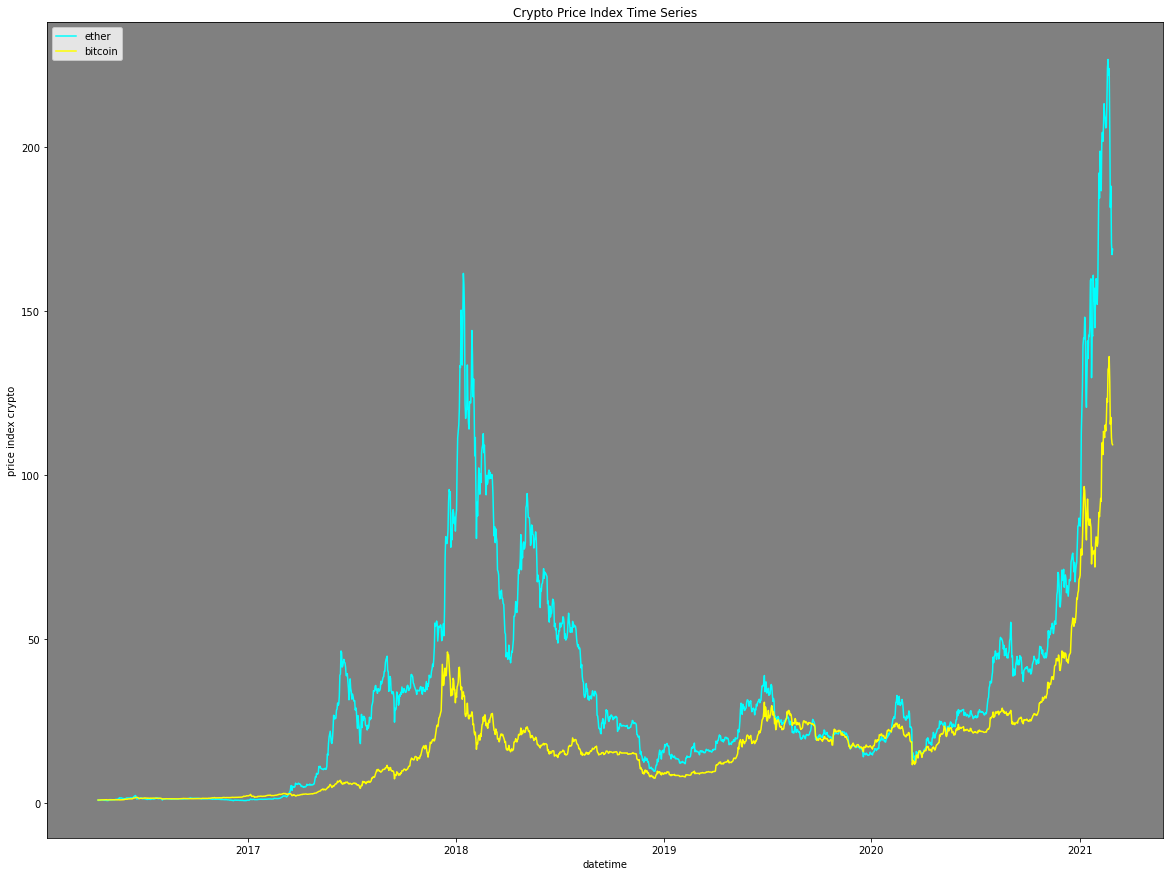

In [81]:
fig, ax = plt.subplots(figsize = (20, 15))
ax.set_facecolor('gray')
sns.lineplot(data = crypto_indexed2, x = 'datetime', y = 'price_index_ether', color = 'cyan', ax = ax, label ='ether')
sns.lineplot(data = crypto_indexed2, x = 'datetime', y = 'price_index_bit', color = 'yellow', ax = ax, label = 'bitcoin')
ax.set_ylabel('price index crypto')
ax.set_title('Crypto Price Index Time Series')
plt.legend()
plt.savefig("Crypto Price Index Over Time", dpi=550)
plt.show()


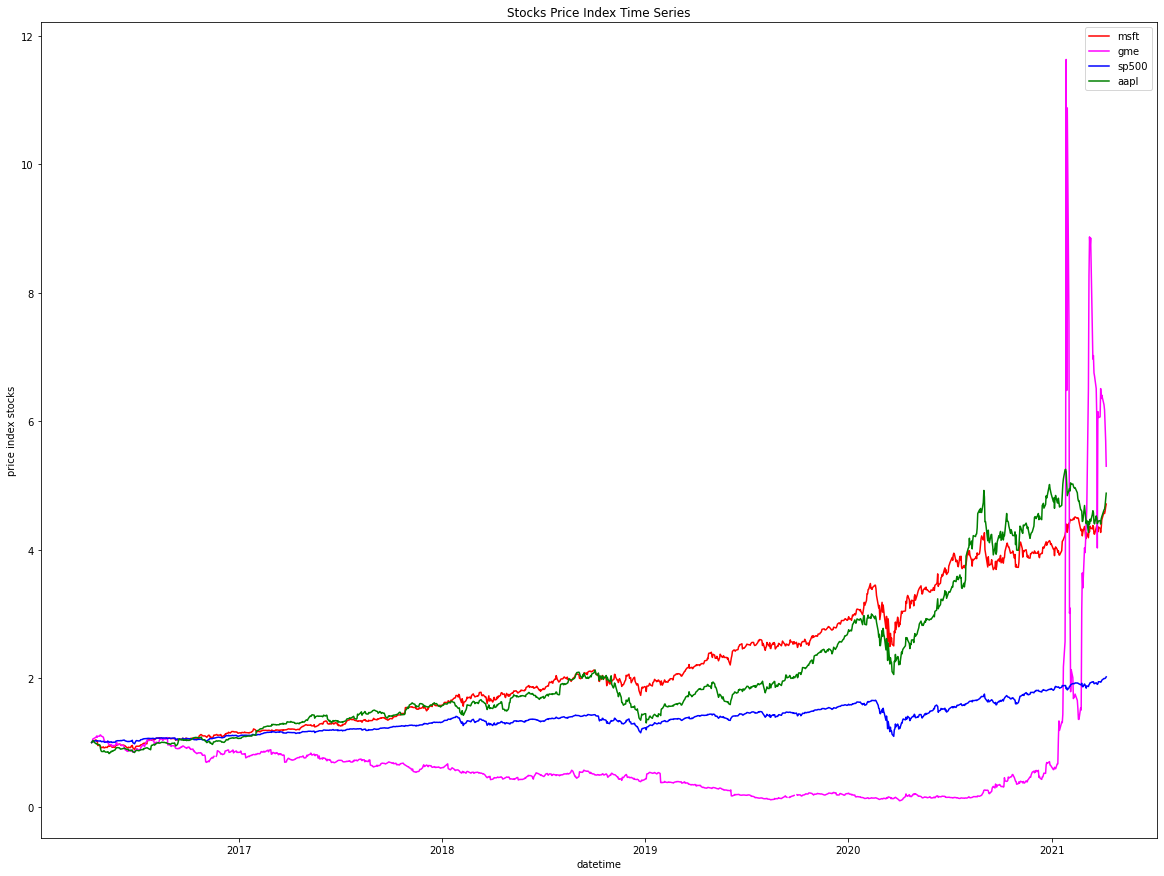

In [115]:
fig, ax = plt.subplots(figsize = (20, 15))
ax.set_ylabel('price index stocks')
sns.lineplot(data = price_index, x = 'datetime', y = 'price_index_msft', color = 'red', ax = ax, label = 'msft')
sns.lineplot(data = price_index, x = 'datetime', y = 'price_index_gme', color = 'magenta', ax = ax, label = 'gme')
sns.lineplot(data = price_index, x = 'datetime', y = 'price_index_sp500', color = 'blue', ax = ax, label = 'sp500')
sns.lineplot(data = price_index, x = 'datetime', y = 'price_index_aapl', color = 'green', ax = ax, label = 'aapl')
plt.legend()
ax.set_title('Stocks Price Index Time Series')
plt.savefig("Stock Price Index Over Time", dpi=550)

# Calculating the Sharpe Ratio

In [65]:
#Set the index as the date column for our stocks
msft = msft.set_index('datetime')
aapl = aapl.set_index('datetime')
sp500 = sp500.set_index('datetime')
gme = gme.set_index('datetime')




In [66]:
#Creating a Df of returns for our 2 stocks so that we can subtract the sp_500 returns
#this is done to calculate the sharpe ratio
ms_aap = msft.merge(aapl, how = 'left', on = 'datetime', suffixes = ('_msft', '_aapl') )

all_together = ms_aap.merge(sp500, how = 'left', on ='datetime', suffixes = ('_msft', '_aapl', '_sp500'))

all_together2 = all_together.merge(gme, how = 'left', on = 'datetime', suffixes = ('_sp500', '_gme'))

all_together2

,symbol_msft,previousClose_msft,close_msft,percent_change_msft,price_index_msft,symbol_aapl,previousClose_aapl,close_aapl,percent_change_aapl,price_index_aapl,symbol_sp500,previousClose_sp500,close_sp500,percent_change_sp500,price_index_sp500,symbol_gme,previousClose_gme,close_gme,percent_change_gme,price_index_gme
datetime,,,,,,,,,,,,,,,,,,,,
2016-04-11,MSFT,None,54.31,NaN,1.000000,AAPL,None,27.255,NaN,1.000000,^GSPC,None,2041.99,NaN,1.000000,GME,None,29.88,NaN,1.000000
2016-04-12,MSFT,54.31,54.65,0.006260,1.006260,AAPL,27.255,27.610,0.013025,1.013025,^GSPC,2041.99,2061.72,0.009662,1.009662,GME,29.88,30.09,0.007028,1.007028
2016-04-13,MSFT,54.65,55.35,0.012809,1.019149,AAPL,27.61,28.010,0.014488,1.027701,^GSPC,2061.72,2082.42,0.010040,1.019799,GME,30.09,31.47,0.045862,1.053213
2016-04-14,MSFT,55.35,55.36,0.000181,1.019333,AAPL,28.01,28.025,0.000536,1.028252,^GSPC,2082.42,2082.78,0.000173,1.019976,GME,31.47,31.65,0.005720,1.059237
2016-04-15,MSFT,55.36,55.65,0.005238,1.024673,AAPL,28.025,27.462,-0.020089,1.007595,^GSPC,2082.78,2080.73,-0.000984,1.018972,GME,31.65,31.79,0.004423,1.063922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,MSFT,242.35,249.07,0.027728,4.586080,AAPL,123,125.900,0.023577,4.619336,^GSPC,4019.87,4077.91,0.014438,1.997027,GME,191.45,186.95,-0.023505,6.256693
2021-04-06,MSFT,249.07,247.86,-0.004858,4.563800,AAPL,125.9,126.210,0.002462,4.630710,^GSPC,4077.91,4073.94,-0.000974,1.995083,GME,186.95,184.50,-0.013105,6.174699
2021-04-07,MSFT,247.86,249.90,0.008230,4.601363,AAPL,126.21,127.900,0.013390,4.692717,^GSPC,4073.94,4079.95,0.001475,1.998026,GME,184.5,177.97,-0.035393,5.956158


In [67]:
# We keep only the percent change column for the stocks we are interested in
msft_aapl_gme_returns = all_together2[['percent_change_msft', 'percent_change_aapl', 'percent_change_gme']]

msft_aapl_gme_returns

sp500_returns = all_together2['percent_change_sp500']

sp500_returns
msft_aapl_gme_returns


,percent_change_msft,percent_change_aapl,percent_change_gme
datetime,,,
2016-04-11,NaN,NaN,NaN
2016-04-12,0.006260,0.013025,0.007028
2016-04-13,0.012809,0.014488,0.045862
2016-04-14,0.000181,0.000536,0.005720
2016-04-15,0.005238,-0.020089,0.004423
...,...,...,...
2021-04-05,0.027728,0.023577,-0.023505
2021-04-06,-0.004858,0.002462,-0.013105
2021-04-07,0.008230,0.013390,-0.035393


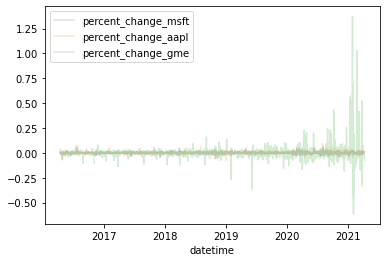

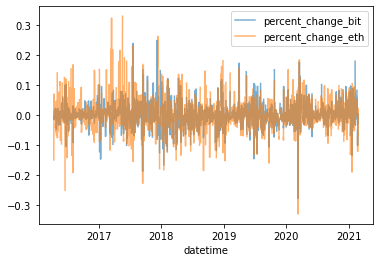

In [87]:
#we create a dataframe with the excess returns for each stock compared to the sp500
excess1_returns = msft_aapl_gme_returns.sub(sp500_returns, axis = 0)
excess1_returns.plot(alpha = 0.2)
plt.savefig("Excess Returns Stocks", dpi=550)
Crypto_excess = return_crypto.sub(sp500_returns, axis = 0)
Crypto_excess
Crypto_excess.plot(alpha = 0.6)
plt.savefig("Excess Returns Crypto", dpi=550)

In [100]:
Crypto_excess.head()

,percent_change_bit,percent_change_eth
datetime,,
2016-04-11,NaN,NaN
2016-04-12,-0.003255,-0.148661
2016-04-13,-0.013464,0.070864
2016-04-14,0.001120,0.042443
2016-04-15,0.013785,-0.016240


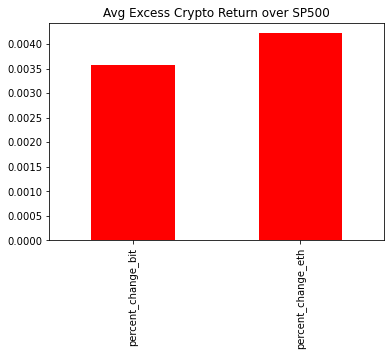

In [88]:
#Calculating the Sharpe Ratio 
#Step 1 Average Excess Return 
avg_crypto_excess = Crypto_excess.mean()
avg_crypto_excess.plot.bar(title = 'Avg Excess Crypto Return over SP500', color = 'red')
plt.savefig("AVG Excess Returns Crypto", dpi=550)


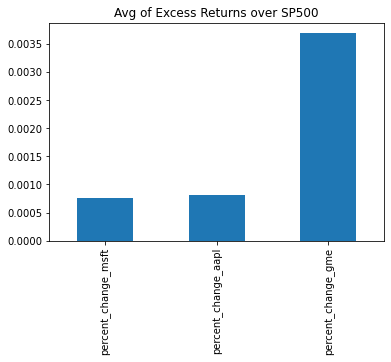

In [89]:
avg_excess_returns = excess1_returns.mean()
avg_excess_returns.plot.bar(title = 'Avg of Excess Returns over SP500')
plt.savefig("AVG Excess Returns Stocks", dpi=550)

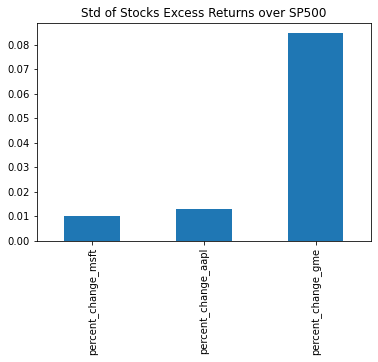

In [90]:
#Calculating Sharpe Ratio
#Step 2: Calculating Standard Deviation of Excess Returns
std_excess = excess1_returns.std()
std_excess.plot.bar(title = 'Std of Stocks Excess Returns over SP500')
#we can see that apple has a higher degree of volatility than microsoft. 
plt.savefig("Risk Excess Returns Stock", dpi=550)

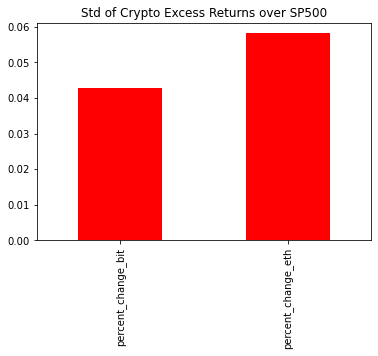

In [91]:
crypto_std_excess = Crypto_excess.std()
crypto_std_excess.plot.bar(title = 'Std of Crypto Excess Returns over SP500', color = 'red')
plt.savefig("Risk Excess Returns Crypto", dpi=550)

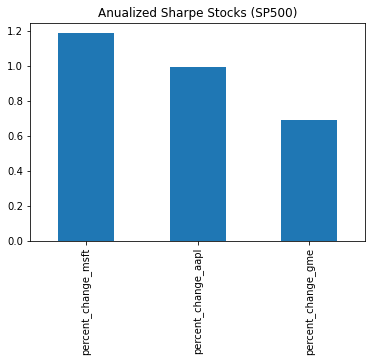

In [92]:
#Sharpe Ratio - Calculating Daily & Anualized Sharpe Ratio (Ratio of avg excess returs / sd excess returns)
daily_sharpe_ratio = avg_excess_returns.div(std_excess)
daily_sharpe_ratio.plot.bar(title = 'Daily Sharpe Ratio Stocks (SP500)')
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title = 'Anualized Sharpe Stocks (SP500)')
plt.savefig("Anualized Sharpe Ratio Stocks", dpi=550)

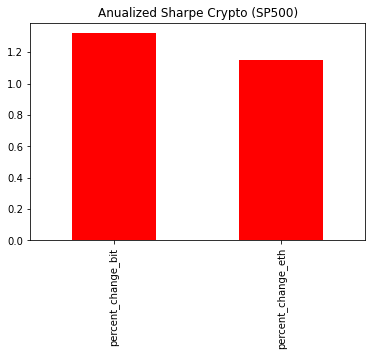

In [93]:
#Sharpe Ratio - Calculating Daily & Anualized Sharpe Ratio for Crypto (Ratio of avg excess returs / sd excess returns)
daily_sharpe_ratio_cr = avg_crypto_excess.div(crypto_std_excess)
daily_sharpe_ratio_cr.plot.bar(title = 'Daily Sharpe Ratio Crypto')
annual_factor = np.sqrt(252)
annual_sharpe_ratio_cr = daily_sharpe_ratio_cr.mul(annual_factor)
annual_sharpe_ratio_cr.plot.bar(title = 'Anualized Sharpe Crypto (SP500)', color = 'red')
plt.savefig("Anualized Sharpe Ratio Crypto", dpi=550)

In [75]:
annual_sharpe_ratio_cr

percent_change_bit    1.32007
percent_change_eth    1.15128
dtype: float64

In [76]:
annual_sharpe_ratio

percent_change_msft    1.186431
percent_change_aapl    0.994350
percent_change_gme     0.692463
dtype: float64

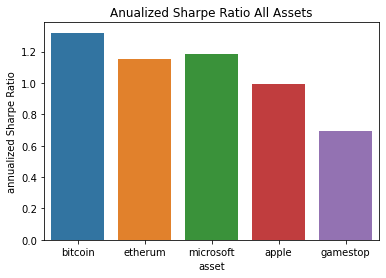

In [95]:
# We join all the data on annual sharpe ratios together into a nice graph. 
total_sharpe = {'asset' : ['bitcoin', 'etherum', 'microsoft', 'apple', 'gamestop'],
'annualized Sharpe Ratio' : [1.320, 1.151, 1.186, .994, .692] }
total_sharpes = pd.DataFrame(total_sharpe, columns = ['asset', 'annualized Sharpe Ratio'])
sns.barplot(data = total_sharpes, x= 'asset', y= 'annualized Sharpe Ratio')
plt.title('Anualized Sharpe Ratio All Assets')
plt.savefig("Annualized Sharpe Ratio All Assets", dpi=550)

In [78]:
msft.percent_change.describe()


count    1258.000000
mean        0.001384
std         0.017402
min        -0.147390
25%        -0.005498
50%         0.001140
75%         0.009281
max         0.142169
Name: percent_change, dtype: float64

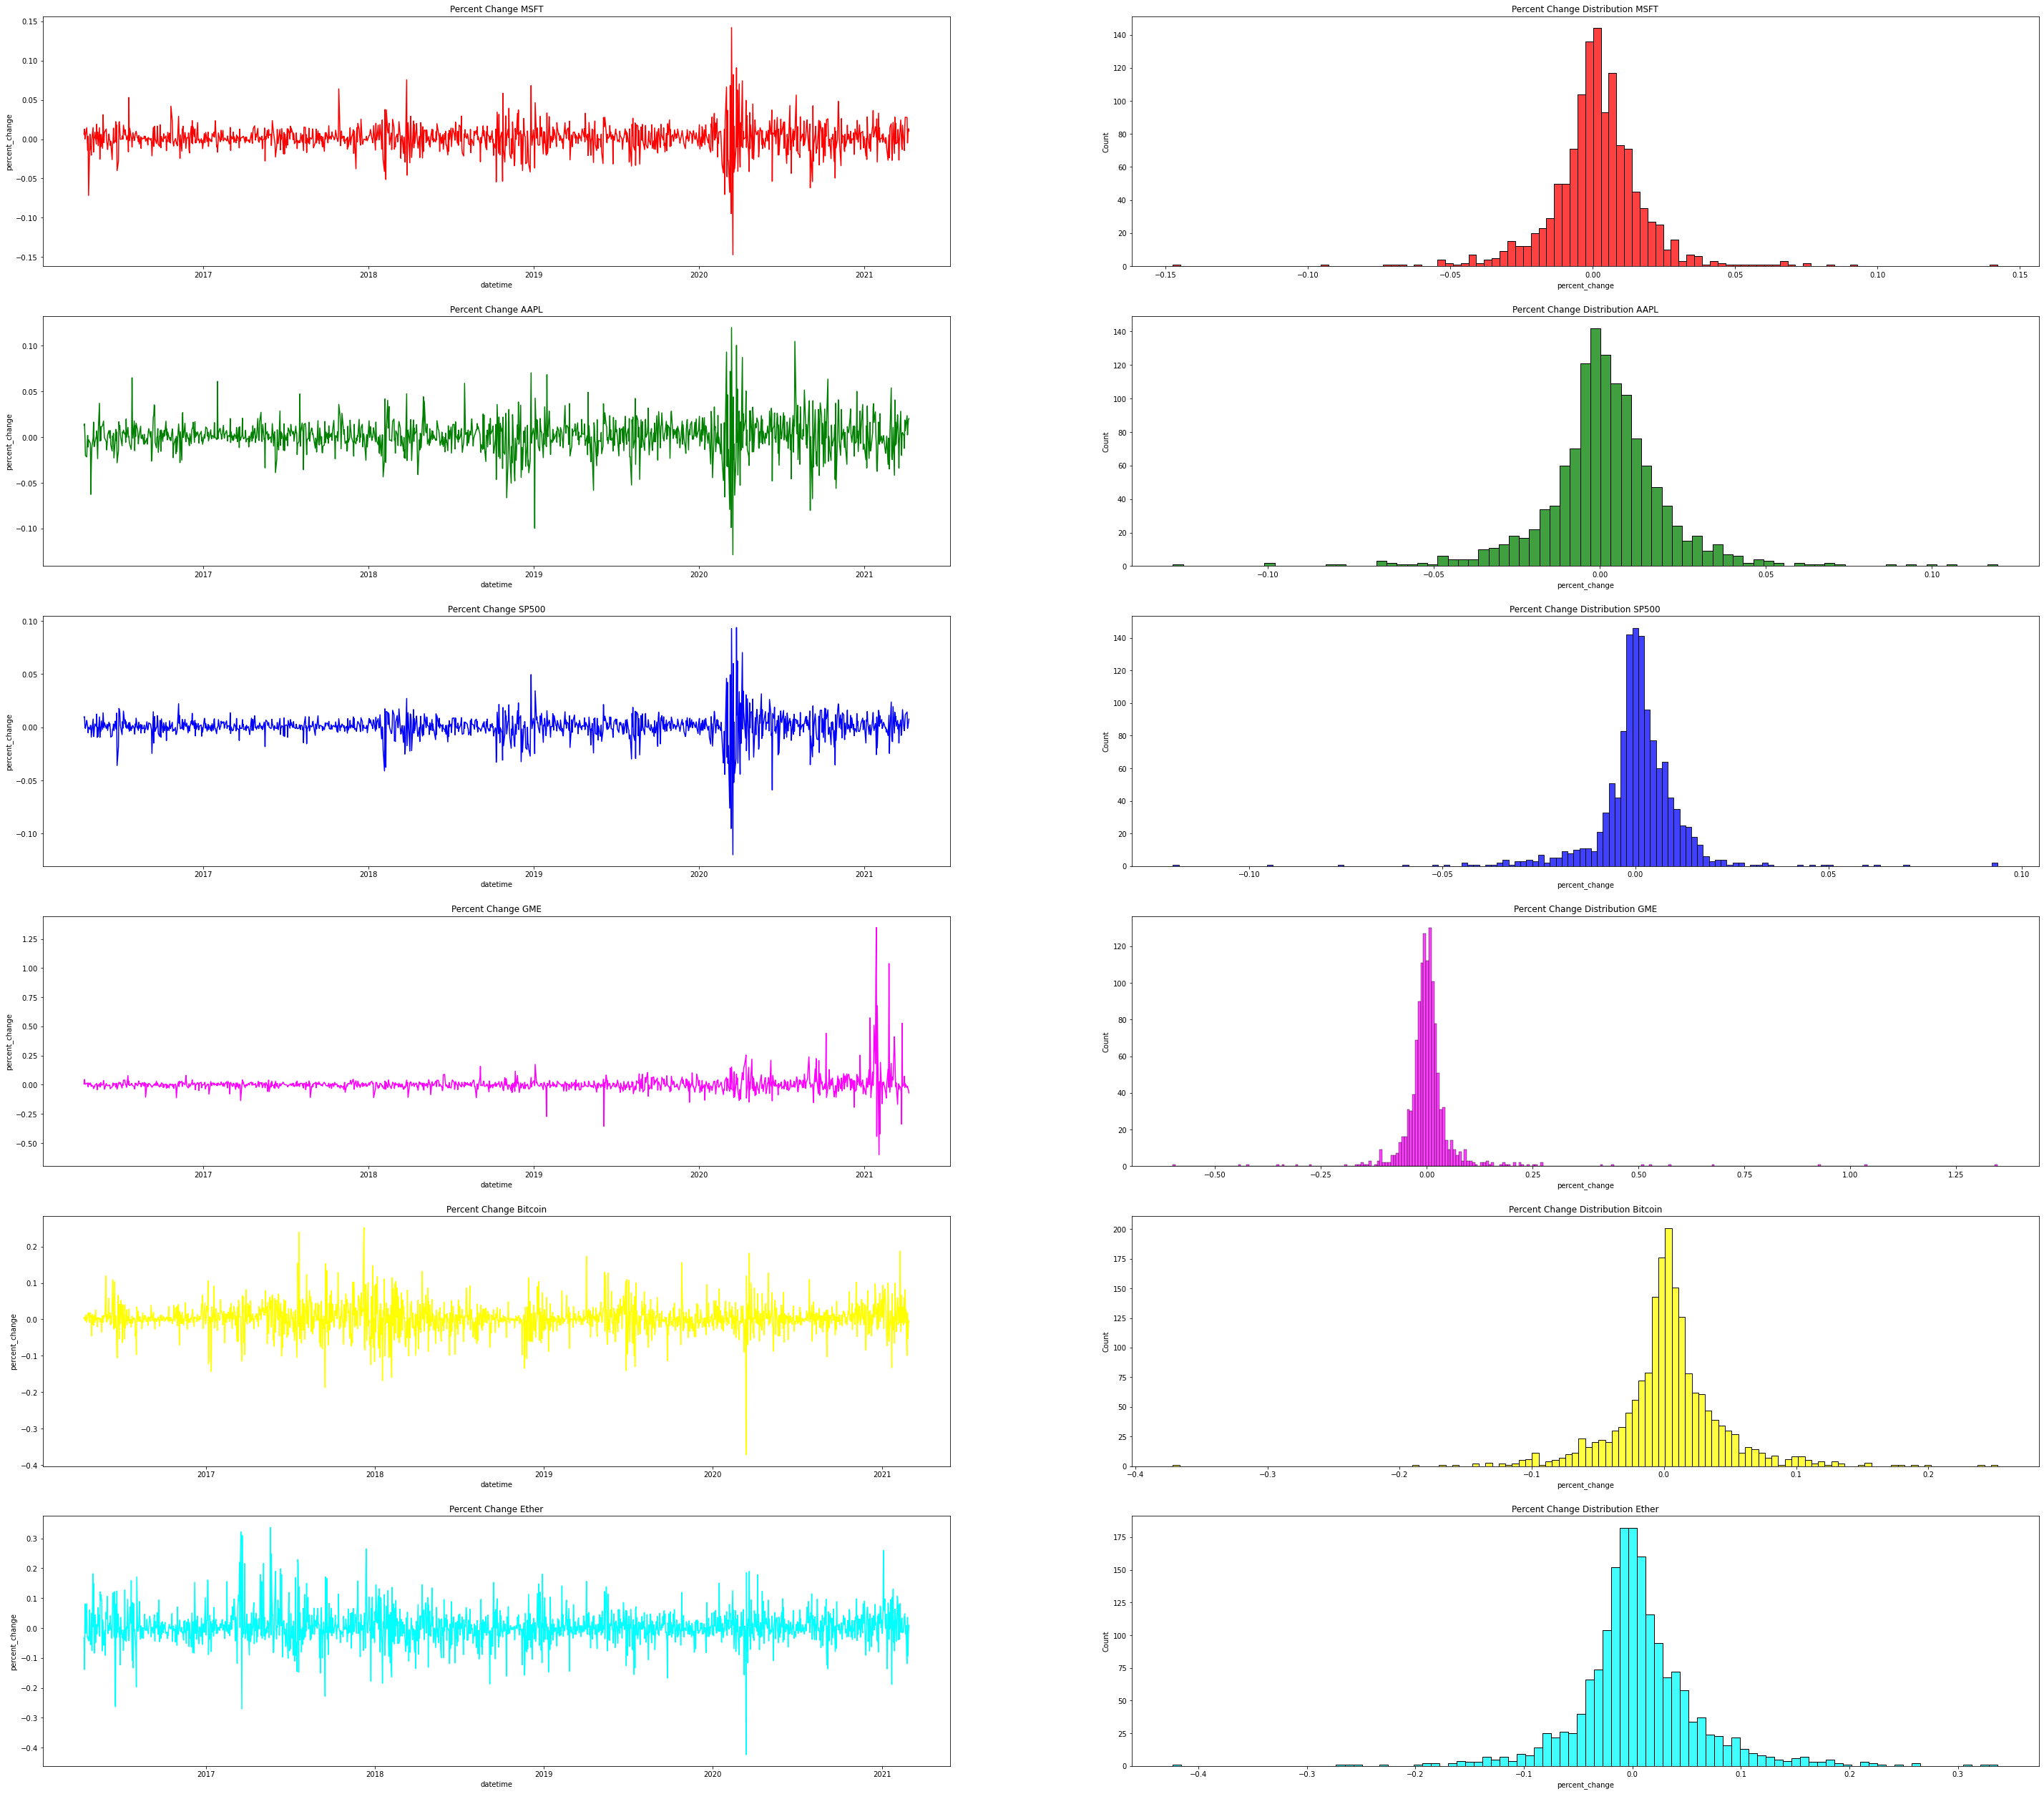

In [96]:
#We plot the return for each stock across a datetime variable, and then plot the distribution of percent changes.
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(50, 45))
sns.lineplot(x = 'datetime', y = 'percent_change', data = msft, color = 'red', ax = axs[0,0])
sns.histplot(x = 'percent_change', data = msft, ax = axs[0,1], color = 'red')
sns.lineplot( x = 'datetime', y = 'percent_change', data = aapl, color = 'green', ax = axs [1, 0])
sns.histplot(x = 'percent_change', data = aapl, ax = axs[1,1], color = 'green')
sns.lineplot(x = 'datetime', y = 'percent_change', data = sp500, color = 'blue', ax = axs [2, 0])
sns.histplot(x = 'percent_change', data = sp500, ax = axs[2,1], color = 'blue')
sns.lineplot(x = 'datetime', y = 'percent_change', data = gme, color = 'magenta', ax = axs [3, 0])
sns.histplot(x = 'percent_change', data = gme, ax = axs[3,1], color = 'magenta')
sns.lineplot(x = 'datetime', y = 'percent_change', data = bitcoin, color = 'yellow', ax = axs [4, 0])
sns.histplot(x = 'percent_change', data = bitcoin, ax = axs[4,1], color = 'yellow')
sns.lineplot(x = 'datetime', y = 'percent_change', data = ether, color = 'cyan', ax = axs [5, 0])
sns.histplot(x = 'percent_change', data = ether, ax = axs[5,1], color = 'cyan')
axs[0,0].set_title("Percent Change MSFT")
axs[0,1].set_title("Percent Change Distribution MSFT")
axs[1,0].set_title("Percent Change AAPL")
axs[1,1].set_title("Percent Change Distribution AAPL")
axs[2,0].set_title("Percent Change SP500")
axs[2,1].set_title("Percent Change Distribution SP500")
axs[3,0].set_title("Percent Change GME")
axs[3,1].set_title("Percent Change Distribution GME")
axs[4,0].set_title("Percent Change Bitcoin")
axs[4,1].set_title("Percent Change Distribution Bitcoin")
axs[5,0].set_title("Percent Change Ether")
axs[5,1].set_title("Percent Change Distribution Ether")
plt.savefig("Percent Change and Distribution of Percentage Changes", dpi=550)

In [99]:
crypto_corr = crypto_indexed2.corr()
crypto_corr

,price_index_bit,price_index_ether
price_index_bit,1.000000,0.849878
price_index_ether,0.849878,1.000000


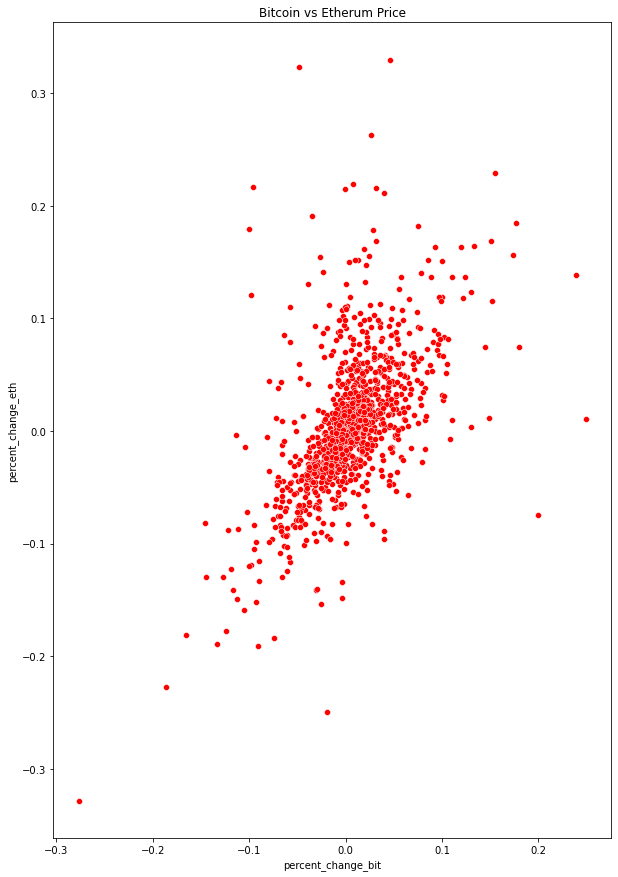

In [109]:
fig, ax = plt.subplots(figsize = (10, 15))
sns.scatterplot(x = 'percent_change_bit', y = 'percent_change_eth', data = Crypto_excess, color = 'red' )
plt.title('Bitcoin vs Etherum Excess Returns')
plt.savefig('Bitcoin vs Etherum Excess Returns')

In [108]:
stock_corr = excess1_returns.corr()
stock_corr

,percent_change_msft,percent_change_aapl,percent_change_gme
percent_change_msft,1.000000,0.282468,-0.027294
percent_change_aapl,0.282468,1.000000,0.029032
percent_change_gme,-0.027294,0.029032,1.000000


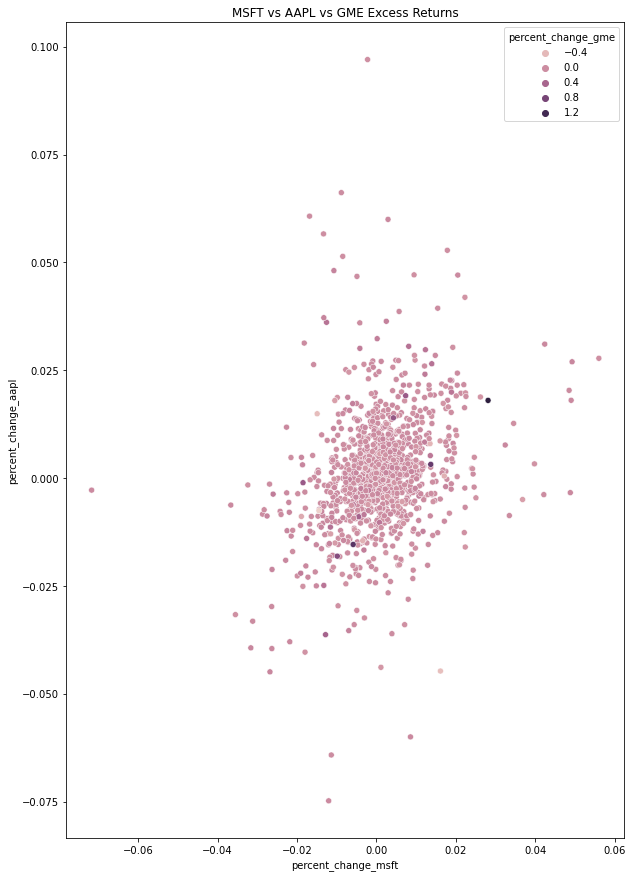

In [113]:
fig, ax = plt.subplots(figsize = (10, 15))
sns.scatterplot(x = 'percent_change_msft', y = 'percent_change_aapl', data = excess1_returns, hue = 'percent_change_gme' )
plt.title('MSFT vs AAPL vs GME Excess Returns')
plt.savefig('GME vs MSFT vs Apple Excess Returns')